In [5]:
#step 1: importing lib
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



In [26]:
#step 1 : load the dataset
df = pd.read_csv(
    r"C:\Users\Dell\Downloads\archive\Genre Classification Dataset\train_data.txt",
    sep=":::",
    engine="python",
    names=["ID", "Title", "Genre", "Description"]
)

df.head()


,ID,Title,Genre,Description
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [7]:
# Step 3: Data Cleaning (Alternative Method)

# Select required columns
train_df = train_df[['Description', 'Genre']].copy()

# Remove leading/trailing spaces
train_df['Description'] = train_df['Description'].str.strip()
train_df['Genre'] = train_df['Genre'].str.strip()

# Drop missing or empty descriptions
train_df.dropna(subset=['Description', 'Genre'], inplace=True)
train_df = train_df[train_df['Description'].str.len() > 0]

# Reset index
train_df.reset_index(drop=True, inplace=True)

print("Cleaned dataset shape:", train_df.shape)


Cleaned dataset shape: (54214, 2)


In [8]:
from sklearn.preprocessing import LabelEncoder


In [10]:
#step 4 : separate feature and tables
X = train_df['Description']
y = train_df['Genre']

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)


In [11]:
#step 5: Train-Test split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y_encoded,
    test_size=0.2,
    random_state=42,
    stratify=y_encoded
)

print("Training samples:", len(X_train))
print("Testing samples:", len(X_test))


Training samples: 43371
Testing samples: 10843


In [12]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer


In [18]:
# Step 6–7: Vectorization + Model (Pipeline Approach)
text_clf = Pipeline([
    ("count", CountVectorizer(
        stop_words="english",
        ngram_range=(1, 2),
        min_df=2
    )),
    ("tfidf", TfidfTransformer()),
    ("clf", LinearSVC(C=1.0))
])

text_clf.fit(X_train, y_train)


,steps,"[('count', ...), ('tfidf', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,input,'content'
,encoding,'utf-8'
,decode_error,'strict'
,strip_accents,None
,lowercase,True
,preprocessor,None
,tokenizer,None


In [19]:
# Step 8: Model Evaluation
y_pred = text_clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


Accuracy: 0.5931015401641612

Classification Report:

              precision    recall  f1-score   support

      action       0.49      0.35      0.41       263
       adult       0.69      0.45      0.54       118
   adventure       0.50      0.23      0.31       155
   animation       0.44      0.14      0.21       100
   biography       0.00      0.00      0.00        53
      comedy       0.54      0.59      0.56      1490
       crime       0.50      0.05      0.09       101
 documentary       0.68      0.85      0.76      2619
       drama       0.57      0.74      0.64      2723
      family       0.44      0.15      0.22       157
     fantasy       0.20      0.03      0.05        65
   game-show       0.88      0.59      0.71        39
     history       0.29      0.04      0.07        49
      horror       0.64      0.66      0.65       441
       music       0.64      0.51      0.56       146
     musical       0.43      0.05      0.10        55
     mystery       0.50    

C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


In [15]:
#Step 9: Predict New Movie Genre
sample_movie = [
    "A young hero rises against a corrupt system to save his family and city"
]

pred_encoded = text_clf.predict(sample_movie)
pred_genre = label_encoder.inverse_transform(pred_encoded)

print("Predicted Genre:", pred_genre[0])


Predicted Genre: action


In [20]:
# Step 10: Save Full Pipeline + Encoder
with open("movie_genre_pipeline.pkl", "wb") as f:
    pickle.dump(text_clf, f)

with open("label_encoder.pkl", "wb") as f:
    pickle.dump(label_encoder, f)


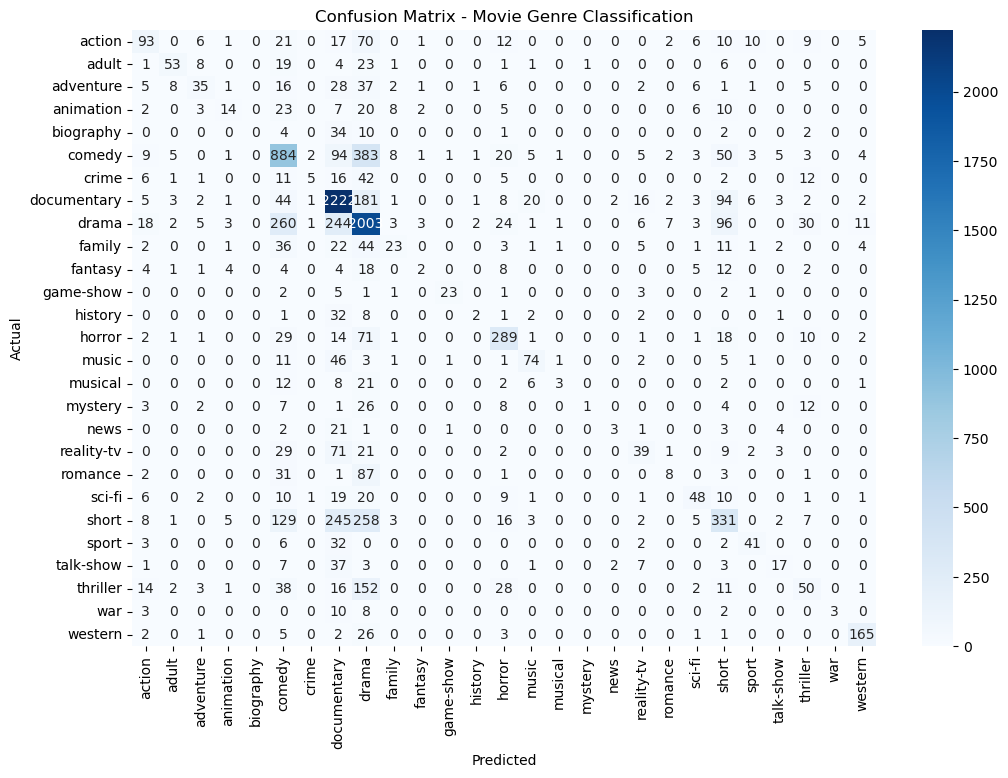

In [27]:
# Step 11: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(12, 8))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=label_encoder.classes_,
    yticklabels=label_encoder.classes_
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Movie Genre Classification")
plt.show()



In [ ]:

# Report 1

#1. Introduction

With the rapid growth of digital media, automatic classification of movies based on their descriptions has become an important task. Movie genre classification helps streaming platforms, recommendation systems, and content organizers to efficiently categorize and recommend movies to users.

This project focuses on building a machine learning–based text classification system that predicts the genre of a movie using its textual description.

#2. Dataset Description

The dataset used for this project is the Movie Genre Classification Dataset.

Dataset Features:

ID: Unique identifier for each movie

Title: Name of the movie

Genre: Movie genre (target variable)

Description: Short textual summary of the movie

The dataset is loaded from a .txt file using a custom delimiter.

#3. Data Loading

The dataset is loaded using the Pandas library. Since the data is stored in a text file with a custom separator, the Python engine is used.

train_df = pd.read_csv(
    "train_data.txt",
    sep=":::",
    engine="python",
    names=["ID", "Title", "Genre", "Description"]
)

#4. Data Cleaning

To ensure high-quality input for the model, the following cleaning steps are applied:

Only Description and Genre columns are retained

Leading and trailing whitespaces are removed

Rows with missing or empty values are dropped

Index is reset for consistency

This step improves model performance and prevents errors during training.

#5. Feature and Label Preparation

Feature (X): Movie descriptions

Label (y): Movie genres

Genres are encoded into numerical values using LabelEncoder to make them compatible with machine learning algorithms.

#6. Train–Test Split

The dataset is split into:

80% training data

20% testing data

Stratified sampling is used to preserve the genre distribution across both sets.

#7. Text Vectorization

Text data is converted into numerical form using:

CountVectorizer for tokenization and n-gram extraction

TF-IDF Transformer to assign importance to meaningful words

Both steps are combined into a Pipeline for cleaner and more efficient processing.

#8. Model Training

A Linear Support Vector Machine (LinearSVC) classifier is used because:

It performs well on high-dimensional text data

It is efficient and accurate for multi-class classification

The pipeline integrates:

Text vectorization

TF-IDF transformation

Classification

#9. Model Evaluation

The trained model is evaluated using:

Accuracy Score

Classification Report (Precision, Recall, F1-score)

These metrics help assess the effectiveness of the model across all genres.

#10. Prediction on New Data

The trained model can predict the genre of unseen movie descriptions.

Example:

"A young hero rises against a corrupt system to save his family and city"


The model successfully predicts the most probable genre for the given description.

#11. Confusion Matrix Visualization

A confusion matrix is plotted using Seaborn to visualize:

Correct predictions

Misclassifications across genres

This helps in understanding model strengths and weaknesses.

#12. Model Saving

To enable reuse without retraining, the following are saved:

Trained Pipeline model

Label Encoder

These files can later be loaded to make predictions on new data.

#13. Conclusion

In this project, a complete movie genre classification system was successfully implemented using machine learning and natural language processing techniques. The use of TF-IDF features and a Linear SVM classifier provided reliable performance.

Key Outcomes:

Effective text preprocessing and feature extraction

Accurate genre prediction

Reusable and scalable model pipeline

This system can be further enhanced using deep learning models such as LSTM or BERT for improved accuracy.

#14. Tools & Technologies Used

Python

Pandas, NumPy

Scikit-learn

Matplotlib, Seaborn

Jupyter Notebook
